#### Machine Learning 5: Only Better Data
- We will see...

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.activations import relu,linear,sigmoid
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, schedules
from tensorflow.keras.callbacks import History

tf.keras.backend.set_floatx('float64')
tf.autograph.set_verbosity(0)


from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
survey = pd.read_excel('Retention_Dataset_CLEAN.xlsx')

#survey.rename(columns={'Q20.1': 'Q20'}, inplace=True)
print(survey.shape)
survey.columns

(941, 61)


Index(['Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q21', 'Q20', 'Q21_1', 'Q21_2', 'Q21_3',
       'Q21_11', 'Q21_12', 'Q21_13', 'Q21_14', 'Q21_15', 'Q21_16', 'Q21_17',
       'Q23_2', 'Q23_3', 'Q23_1', 'Q23_4', 'Q22_1', 'Q22_2', 'Q22_3', 'Q22_4',
       'Q22_5', 'Q22_6', 'Q22_8', 'Q22_7', 'Q24_1', 'Q24_2', 'Q24_8', 'Q24_3',
       'Q24_7', 'Q24_4', 'Q24_5', 'Q24_6', 'Q25_4', 'Q25_5', 'Q25_6', 'Q25_7',
       'Q25_8', 'Q25_9', 'Spr_22_Ret', 'Fa_22_Ret',
       'Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 'Q29_Female',
       'Q29_Male', 'Q29_Non-binary / third gender', 'Q29_Prefer not to say',
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
       'Q22_Off-Campus (with family)', 'Q22_Off-Campus (with friends etc.)',
       'Q22_On-Campus', 'Q22_Other'],
      dtype='object')

### Task 1: Create the training set & the result set

"just_data" will be the matrix of data that contains the survey data for each student.
"y_vals" will be the "matrix" of data that contains the retention result.

Both of these will then be converted into Numpy matrices that we will label "X" and "y."
Using these labels will allow us to reuse the code from the ML course with fewer changes.

In [3]:
data_columns = ['Q27_American Indian or Alaska Native', 'Q27_Asian', 
                'Q27_Black or African American', 'Q27_Other', 'Q27_White',
                'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes',
                'Q21_1', 'Q21_16', 'Q22_3', 'Q21_2', 'Q22_7', 'Q25_7', 'Q24_3', 
                'Q21_14', 'Q24_6', 'Q25_9', 'Q25_4', 'Q20', 'Q9', 'Q21_12', 'Q21_3']

just_data = survey[data_columns]
print(just_data.shape)

y_vals = survey[['Fa_22_Ret']]
y_vals.shape

(941, 23)


(941, 1)

In [4]:
these_cols = ['Q27_American Indian or Alaska Native', 'Q27_Asian',
       'Q27_Black or African American', 'Q27_Other', 'Q27_White', 
       'Q30_No', 'Q30_Prefer not to say', 'Q30_Yes']
for col in these_cols:
    just_data[col] = np.where(just_data[col] == True, 1, 0)

In [5]:
y_vals.value_counts()

Fa_22_Ret
1            714
0            227
dtype: int64

In [6]:
X = just_data.to_numpy()
y = y_vals.to_numpy()
y = y.ravel()

In [7]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [0 0 0 0 1 1 0 0 2 2 1 2 1 4 4 2 4 0 4 0 3 2 2]
The first element of y is:  1
The shape of X is: (941, 23)
The shape of y is: (941,)


#### Split the Dataset

In [8]:
#split the data using sklearn routine 
#X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.4, random_state=19)
#X_val, X_test, y_val, y_test = train_test_split(X_,y_,test_size=0.50, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=19)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
#print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (470, 23) y_train.shape (470,)
X_test.shape (471, 23) y_test.shape (471,)


In [9]:
def graph_loss_vs_epochs(history):
    '''Generates a simple plot showing the loss descent across epochs. 
    Parameter is the history object associated with the TensorFlow model.'''
    train_loss = history.history['loss']
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    #plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

In [10]:
def plot_loss_vs_accuracy_complex(history):
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss vs accuracy 
    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_loss) + 1), train_accuracy, label='Training Accuracy')
    plt.plot(range(1, len(val_loss) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [11]:
def plot_loss_vs_accuracy(history):
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    # Plot the loss and accuracy side-by-side
    plt.figure(figsize=(15, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [12]:
def learn_rate_vs_accuracy(learning_rates, val_accuracy):
    plt.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate')
    plt.plot(range(1, len(learning_rates) + 1), val_accuracy, label='Validation Accuracy')
    plt.xlabel('Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [13]:
def learn_rate_vs_TV_accuracy(learning_rates, train_accuracy, val_accuracy):
    #plt.plot(range(1, len(learning_rates) + 1), learning_rates, label='Learning Rate')
    #plt.plot(range(1, len(learning_rates) + 1), val_accuracy, label='Validation Accuracy')
    #plt.plot(range(1, len(learning_rates) + 1), train_accuracy, label='Training Accuracy')
    plt.plot(learning_rates, val_accuracy, label='Validation Accuracy')
    plt.plot(learning_rates, train_accuracy, label='Training Accuracy')
    plt.xlabel('Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # To avoid overlapping labels and titles
    plt.show()

In [14]:
l2_rate = 0.000001
drop_rate = 0.5

small_model = Sequential(
        [
            tf.keras.Input(shape=(X_train.shape[1],)),    #specify input size
            #layers.Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            #layers.Dropout(drop_rate),
            layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            layers.Dropout(drop_rate),
            layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)),
            layers.Dropout(drop_rate),
            layers.Dense(units=1, activation='sigmoid')
        ], name = "Simple"
    )

small_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
    )

history = small_model.fit(
    X_train,y_train,
    epochs=100, validation_data=(X_test, y_test)
)

Epoch 1/100
15/15 [==============================] - 3s 51ms/step - loss: 1.2011 - accuracy: 0.5213 - val_loss: 0.6690 - val_accuracy: 0.6369
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9298 - accuracy: 0.5766 - val_loss: 0.6427 - val_accuracy: 0.6794
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8812 - accuracy: 0.5511 - val_loss: 0.6288 - val_accuracy: 0.7006
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8105 - accuracy: 0.6191 - val_loss: 0.6230 - val_accuracy: 0.7070
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8094 - accuracy: 0.5489 - val_loss: 0.6216 - val_accuracy: 0.7176
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 0.7248 - accuracy: 0.6149 - val_loss: 0.6138 - val_accuracy: 0.7601
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.6532 - val_loss: 0.5976 - val_accuracy: 0.7771
Epoch 8/1

15/15 [==============================] - 0s 5ms/step - loss: 0.5771 - accuracy: 0.7426 - val_loss: 0.5309 - val_accuracy: 0.7749
Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5743 - accuracy: 0.7426 - val_loss: 0.5322 - val_accuracy: 0.7749
Epoch 60/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.7426 - val_loss: 0.5346 - val_accuracy: 0.7749
Epoch 61/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5693 - accuracy: 0.7447 - val_loss: 0.5363 - val_accuracy: 0.7749
Epoch 62/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5608 - accuracy: 0.7383 - val_loss: 0.5338 - val_accuracy: 0.7771
Epoch 63/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5549 - accuracy: 0.7426 - val_loss: 0.5299 - val_accuracy: 0.7749
Epoch 64/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5722 - accuracy: 0.7383 - val_loss: 0.5315 - val_accuracy: 0.7749
Epoch 65/100
15/15

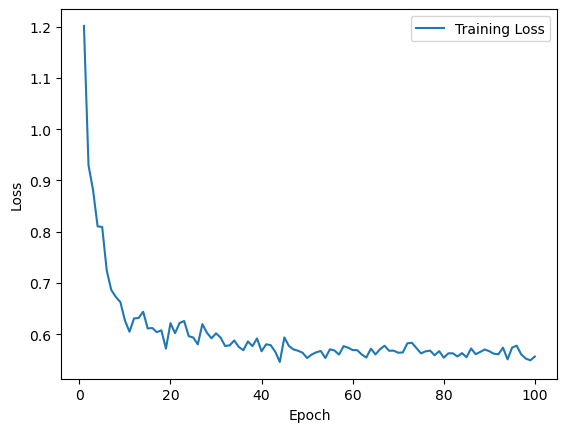

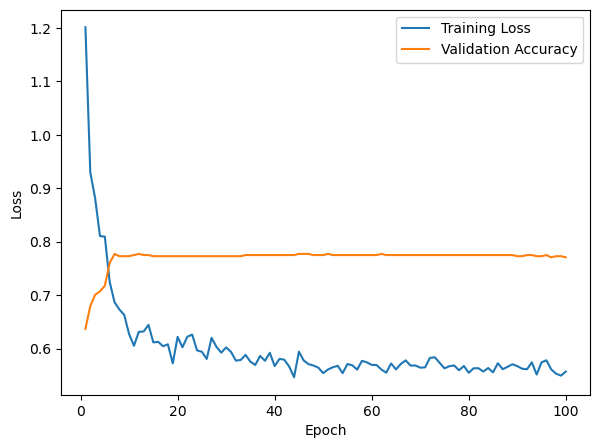

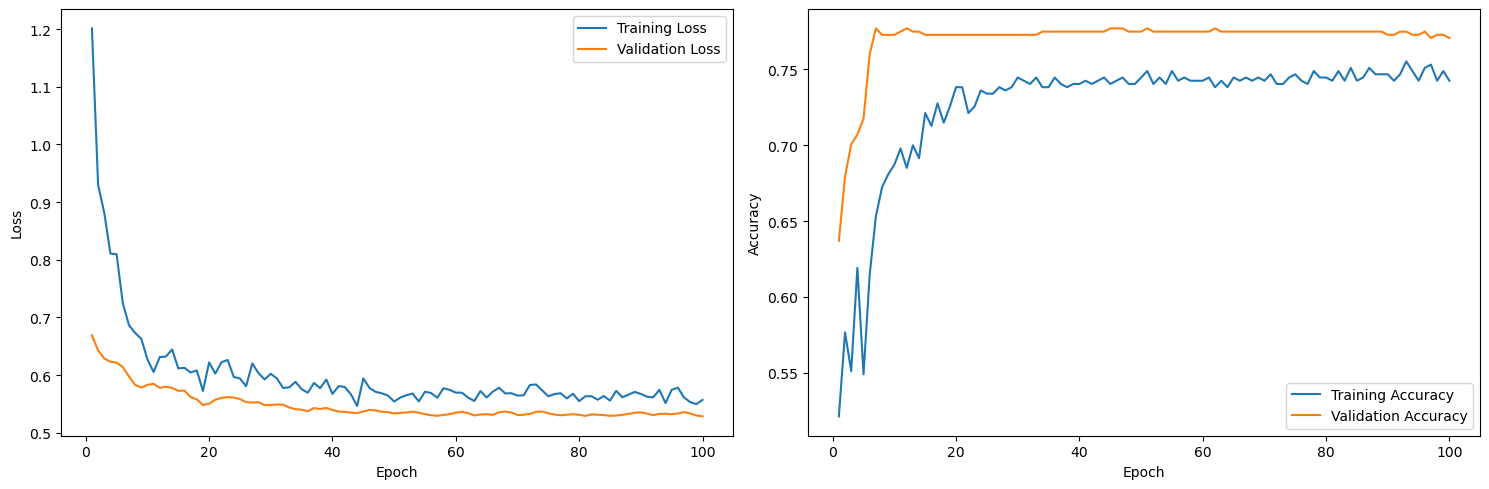

In [15]:
graph_loss_vs_epochs(history)

plot_loss_vs_accuracy(history)

plot_loss_vs_accuracy_complex(history)

In [16]:
def test_predictions(predicted_values, actual_values, threshold):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(predicted_values)):
        if predicted_values[i] > threshold:
            prediction = 1
        else:
            prediction = 0
        if prediction == actual_values[i]:
            if prediction == 1:
                TP += 1
            else:
                TN += 1
        else:
            if prediction == 1:
                FP += 1
            else:
                FN += 1
    #confusion_matrix = np.array([[TP, FP], [FN, TN]])
    confusion_matrix = [TP, FP, FN, TN]
    accuracy = (TP+TN)/len(predicted_values)
    return accuracy, confusion_matrix
            

In [17]:
def plot_accuracy(predicted_values, actual_values, low_thresh, high_thresh, CM=False):
    accuracy_results = []
    precision_rates = []
    false_ns = []
    false_ps = []
    thresholds = []
    
    for threshold in range(low_thresh, high_thresh):
        accuracy, confusion_matrix = test_predictions(predicted_values, actual_values, threshold/100)
        TP = confusion_matrix[0]
        FP = confusion_matrix[1]
        FN = confusion_matrix[2]
        TN = confusion_matrix[3]
        accuracy_results.append(accuracy)
        try:
            precision_rates.append(TP / (TP + FP))
        except:
            precision_rates.append(1)
        false_ns.append(FN/len(predicted_values))
        false_ps.append(FP/len(predicted_values))
        thresholds.append(threshold/100)
        if CM == True:
            matrix = np.array([[TP, FP], [FN, TN]])
            print()
            print(f'The threshold for this test was: {threshold}')
            print(matrix)
        
            print(f'This would lead to {FN+TN} interviews, and would catch {round((TN/(FP+TN) * 100), 1)}% of the departees.')
            print(f'The accuracy of this prediction was {round((accuracy * 100), 1)}%')
            try:
                eff = round((TN/(FN+TN)*100), 1)
            except:
                eff = 100
            print(f'The "efficiency" of this prediction was {eff}%')
        
    data = {'Accuracy': accuracy_results,
           'False Negatives': false_ns,
           'False Positives': false_ps,
           'Threshold': thresholds}
    df = pd.DataFrame(data)
    df.plot('Threshold', ['Accuracy', 'False Negatives', 'False Positives'], figsize=(12,6))
    #probability = plt.gca().lines[2].set_linewidth(3)
    #weighted = plt.gca().lines[1].set_linestyle('--')
    plt.xlabel('Threshold')
    plt.title('Predictive Accuracy for TesorFlow Binary-Cross-Entropy Model')
    #plt.legend(loc='lower left')
    plt.show()
    
    

In [18]:
#
predicted_values = small_model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


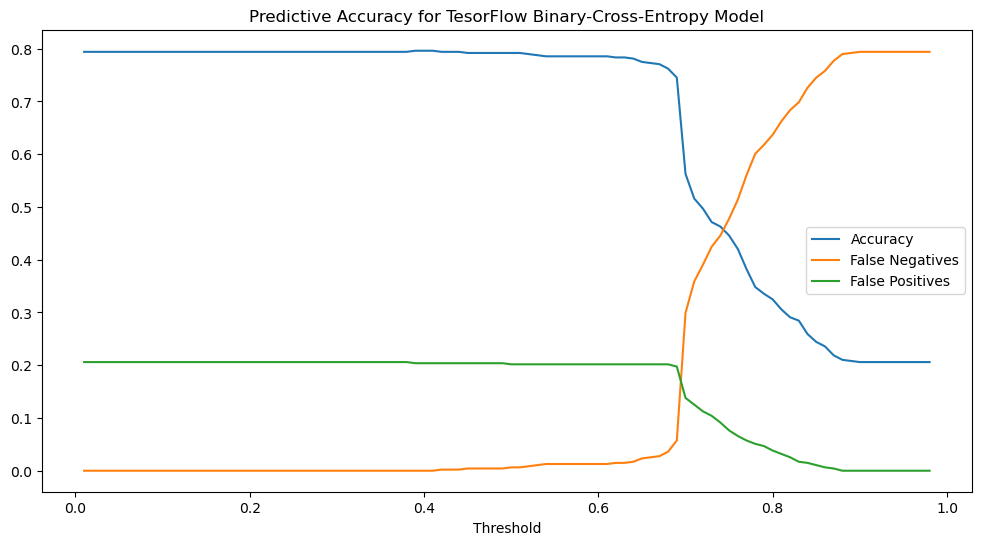

In [19]:
#plot_accuracy(predicted_values, y_test, 1, 99)
plot_accuracy(predicted_values, y, 1, 99)


The threshold for this test was: 60
[[362 101]
 [  4   4]]
This would lead to 8 interviews, and would catch 3.8% of the departees.
The accuracy of this prediction was 77.7%
The "efficiency" of this prediction was 50.0%

The threshold for this test was: 61
[[362 101]
 [  4   4]]
This would lead to 8 interviews, and would catch 3.8% of the departees.
The accuracy of this prediction was 77.7%
The "efficiency" of this prediction was 50.0%

The threshold for this test was: 62
[[361 101]
 [  5   4]]
This would lead to 9 interviews, and would catch 3.8% of the departees.
The accuracy of this prediction was 77.5%
The "efficiency" of this prediction was 44.4%

The threshold for this test was: 63
[[361 101]
 [  5   4]]
This would lead to 9 interviews, and would catch 3.8% of the departees.
The accuracy of this prediction was 77.5%
The "efficiency" of this prediction was 44.4%

The threshold for this test was: 64
[[360 101]
 [  6   4]]
This would lead to 10 interviews, and would catch 3.8% of th

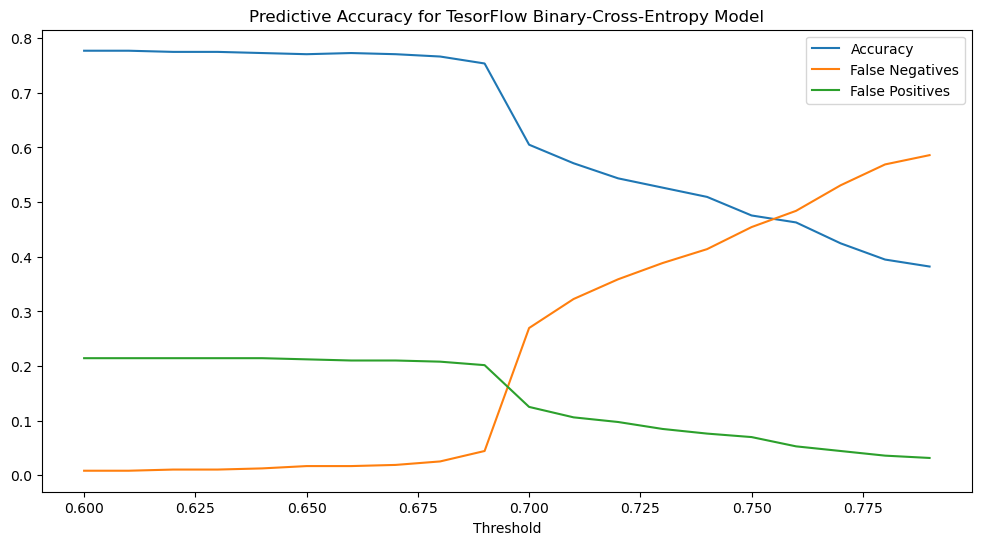

In [20]:
#plot_accuracy(predicted_values, y_test, 60, 90, CM=True)
plot_accuracy(predicted_values, y_test, 60, 80, CM=True)

## Summary:
- 